In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
#from datetime import datetime
import os
#import requests
import pandas as pd
#import numpy as np
import xarray as xr
#import datetime
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

#filepath = './../../imerg/imerg'
filepath = '../data/daily/imerg'
fileout = '../data/imerg'


In [5]:
#combine all files in year into a single file
istart=0
for year in range(2023,2025):
    for day in range(1, 366):  
        file_name = filepath+str(year)+str(day)+'.nc'
        if not(os.path.exists(file_name)):
            continue
        #print(file_name)
        ds_ts=xr.open_dataset(file_name)
        if istart==0:
            ds_ts2 = ds_ts
            istart=1
        else:
            ds_ts2 = xr.concat([ds_ts2,ds_ts],dim='time')
        ds_ts.close()    
file_output_name = fileout+str(year)+'_all.nc'
ds_ts2.to_netcdf(file_output_name)
df = ds_ts2.to_dataframe()
df = df.drop(columns=['lon','lat'])
file_output_name = fileout+'_all.csv'
df.to_csv(file_output_name)
print('output',file_output_name)

# Jun 21, 2023, 14:58 GMT
#Jun 20, 2024, 20:51 GMT
file_output_name = fileout+'_2023SummerSol.nc'
ds = ds_ts2.sel(time=slice('2023-06-21T14:58','2024-06-20T20:51'))
ds.to_netcdf(file_output_name)
df = ds.to_dataframe()
df = df.drop(columns=['lon','lat'])

output ../data/imerg_all.csv
output ../data/imerg_2023SummerSol.csv


In [8]:
df.head(5)

,precipitation
time,
2023-06-21 15:00:00,0.0
2023-06-21 15:30:00,0.0
2023-06-21 16:00:00,0.0
2023-06-21 16:30:00,0.0
2023-06-21 17:00:00,0.0


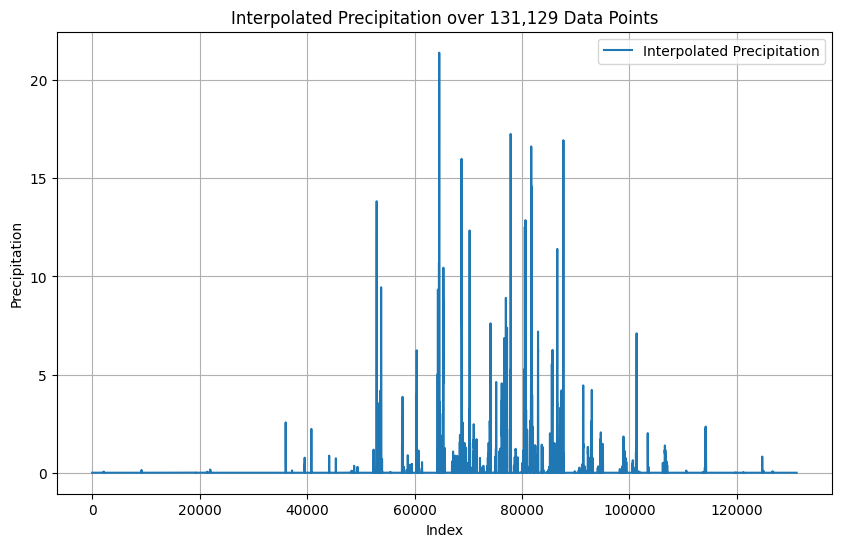

In [11]:
#normalize and interpolate 
import numpy as np

# Step 1: Reset the index if 'time' is currently the index
df.reset_index(drop=True, inplace=True)

# Step 2: Generate a new index to match the number of points for interpolation
new_index = np.linspace(0, len(df) - 1, 131129)

# Step 3: Set the original index to a range and interpolate 'Precipitation'
df_interpolated = pd.DataFrame({
    'precipitation': np.interp(new_index, np.arange(len(df)), df['precipitation'])
})

# Step 4: Reset the index to be integer-based
df_interpolated.reset_index(drop=True, inplace=True)

# Step 5: Normalize the 'Precipitation' column using Min-Max scaling
min_val = df_interpolated['Precipitation'].min()
max_val = df_interpolated['Precipitation'].max()

df_interpolated['Precipitation'] = (df_interpolated['Precipitation'] - min_val) / (max_val - min_val)

# Step : Plot the interpolated data
plt.figure(figsize=(10, 6))
plt.plot(df_interpolated.index, df_interpolated['precipitation'], label='Interpolated Precipitation')
plt.title('Interpolated Precipitation over 131,129 Data Points')
plt.xlabel('Index')
plt.ylabel('Precipitation')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
file_output_name = fileout+'_2023_2024_SummerSol_norm_interpolated.csv'
df_interpolated.to_csv(file_output_name, index=True)
print('output',file_output_name)

output ../data/imerg_2023_2024_SummerSol_norm_interpolated.csv


In [ ]:
ds_ts2.precipitation.plot()
ds.precipitation.plot()